In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!nvidia-smi

Tue Jan 16 07:57:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [5]:
#Importing libraries
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [6]:
import matplotlib.pyplot as plt

In [7]:
ROOT_PATH = "/content/drive/MyDrive/cat-dog-project"

In [8]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/cat-dog-project'

In [9]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/cat-dog-project/PetImages/train'
valid_path = '/content/drive/MyDrive/cat-dog-project/PetImages/validation'

In [10]:
#Importing vgg16

vgg16 = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
for layer in vgg16.layers:
  print(layer)

In [12]:
for layer in vgg16.layers:
  layer.trainable = False

In [13]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
folders = glob('/content/drive/MyDrive/cat-dog-project/PetImages/train/*')

In [15]:
folders

['/content/drive/MyDrive/cat-dog-project/PetImages/train/Cat',
 '/content/drive/MyDrive/cat-dog-project/PetImages/train/Dog']

In [16]:
#Creating model architecture

model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [18]:
# compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [19]:
#Data Augumentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [20]:
# Training data
training_set=train_datagen.flow_from_directory('PetImages/train',
                                               target_size = (244,244),
                                               batch_size=32,
                                               class_mode='categorical')

Found 337 images belonging to 2 classes.


In [21]:
test_set=test_datagen.flow_from_directory('PetImages/validation',
                                               target_size = (244,244),
                                               batch_size=32,
                                               class_mode='categorical')

Found 57 images belonging to 2 classes.


In [22]:
# fit the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
11/11 [==============================] - 95s 9s/step - loss: 5.1511 - accuracy: 0.5163 - val_loss: 3.9225 - val_accuracy: 0.4912
Epoch 2/10
11/11 [==============================] - 8s 720ms/step - loss: 1.4612 - accuracy: 0.6261 - val_loss: 0.6645 - val_accuracy: 0.7544
Epoch 3/10
11/11 [==============================] - 6s 554ms/step - loss: 0.4239 - accuracy: 0.8042 - val_loss: 0.5698 - val_accuracy: 0.7544
Epoch 4/10
11/11 [==============================] - 7s 582ms/step - loss: 0.2037 - accuracy: 0.9021 - val_loss: 0.4111 - val_accuracy: 0.8246
Epoch 5/10
11/11 [==============================] - 8s 711ms/step - loss: 0.1370 - accuracy: 0.9525 - val_loss: 0.3679 - val_accuracy: 0.8421
Epoch 6/10
11/11 [==============================] - 6s 556ms/step - loss: 0.1278 - accuracy: 0.9525 - val_loss: 0.4675 - val_accuracy: 0.7895
Epoch 7/10
11/11 [==============================] - 8s 726ms/step - loss: 0.1141 - accuracy: 0.9585 - val_loss: 0.3814 - val_accuracy: 0.8070
Epoch 8/

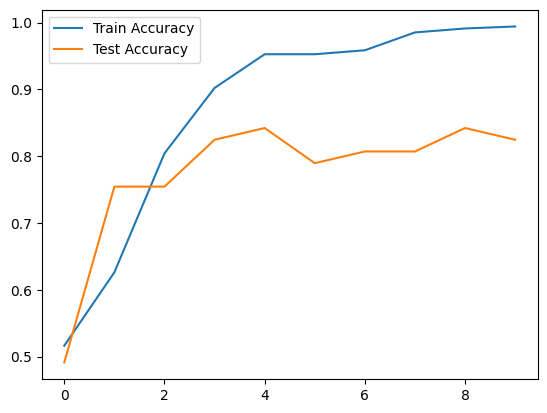

<Figure size 640x480 with 0 Axes>

In [38]:
#ploting accuracy loss for train and test
plt.plot(r.history['accuracy'],label='Train Accuracy')
plt.plot(r.history['val_accuracy'],label='Test Accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy_comparision')

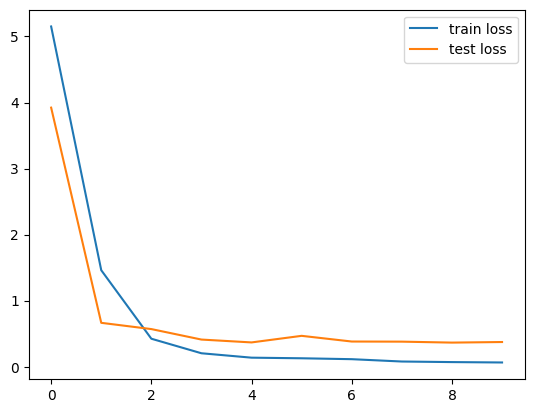

<Figure size 640x480 with 0 Axes>

In [24]:
#ploting accuracy loss for train and test
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend()
plt.show()
plt.savefig('Accuracy_loss')

In [25]:
# Saving model
model.save('model_clf.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
y_pred = model.predict(test_set)

2/2 [==============================] - 1s 202ms/step


In [27]:
y_pred = np.argmax(y_pred,axis=1)

In [28]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [29]:
# load Image
img = image.load_img('/content/drive/MyDrive/cat-dog-project/cat.2428.jpg',target_size=(224,224))

In [30]:
x=image.img_to_array(img)

In [31]:
x

array([[[232., 234., 233.],
        [235., 237., 236.],
        [236., 238., 237.],
        ...,
        [246., 233., 227.],
        [242., 229., 223.],
        [233., 230., 225.]],

       [[225., 227., 226.],
        [229., 231., 230.],
        [232., 234., 233.],
        ...,
        [242., 234., 232.],
        [248., 239., 234.],
        [243., 240., 235.]],

       [[221., 223., 222.],
        [221., 223., 222.],
        [222., 224., 223.],
        ...,
        [251., 252., 255.],
        [237., 237., 237.],
        [242., 241., 237.]],

       ...,

       [[255., 253., 255.],
        [255., 253., 255.],
        [255., 253., 255.],
        ...,
        [170., 156., 143.],
        [153., 141., 129.],
        [156., 147., 132.]],

       [[255., 253., 255.],
        [255., 253., 255.],
        [255., 253., 255.],
        ...,
        [171., 157., 144.],
        [159., 147., 135.],
        [151., 142., 127.]],

       [[255., 253., 255.],
        [255., 253., 255.],
        [255., 2

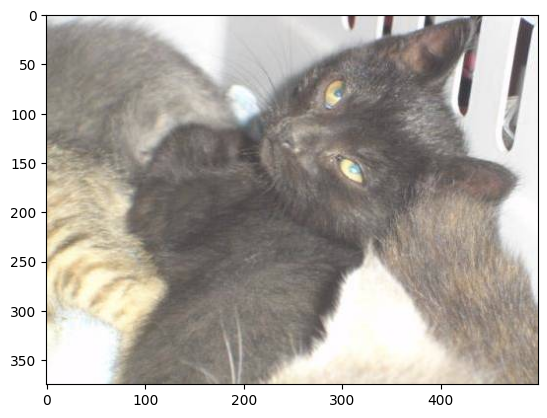

In [32]:
z=plt.imread('/content/drive/MyDrive/cat-dog-project/cat.2428.jpg')
plt.imshow(z)

In [33]:
#scaling image
x=x/255

In [34]:
#predicting Image
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[9.9930012e-01, 6.9991866e-04]], dtype=float32)

In [36]:
result = np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 18ms/step


In [37]:
if result[0]==1:
  prediction='dog'
  print(prediction)
else:
  prediction='cat'
  print(prediction)

cat
